<a href="https://colab.research.google.com/github/Tattou20/Machine_Learning/blob/main/DecisionTree_RandomForest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ursulla Navalona Arivola N01586516 - Assignment 8

In [35]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import pandas as pd
from IPython import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')





## Importation of the dataset

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
dr=pd.read_csv('gdrive/My Drive/titanic_train.csv')

In [6]:
dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Droping of the features “ Name, Ticket and Cabin”

In [7]:
dr.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
dr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Convertion of categorical features into integers

### Creation of Dummy Variables and dropping first column to avoid multicollinearity

In [8]:
Sex = pd.get_dummies(dr['Sex'],drop_first = True)
Embark = pd.get_dummies(dr['Embarked'],drop_first = True)

### Addition of dummy variables to original data

In [9]:
dr = pd.concat([dr, Sex, Embark], axis = 1)
dr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


### Remove of Sex and Embarked because dummy variables are created

In [10]:
dr.drop(['Sex', 'Embarked'], axis=1, inplace = True)
dr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Check of Null Values

In [11]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

### Replace of Null Values in "Age" with mean value of "Age"

In [12]:
dr.fillna(value = { "Age" : dr['Age'].mean()}, inplace = True)

In [13]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

### Drop all the rows containing Null Values

In [14]:
dr.dropna(inplace=True)

In [15]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [16]:
dr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Extraction of features and labels

In [17]:
X = dr.drop(['Survived'], axis = 1).values

In [18]:
y = dr['Survived'].values

### Visualizatio of the data

In [19]:
X.shape

(891, 9)

In [20]:
y.shape

(891,)

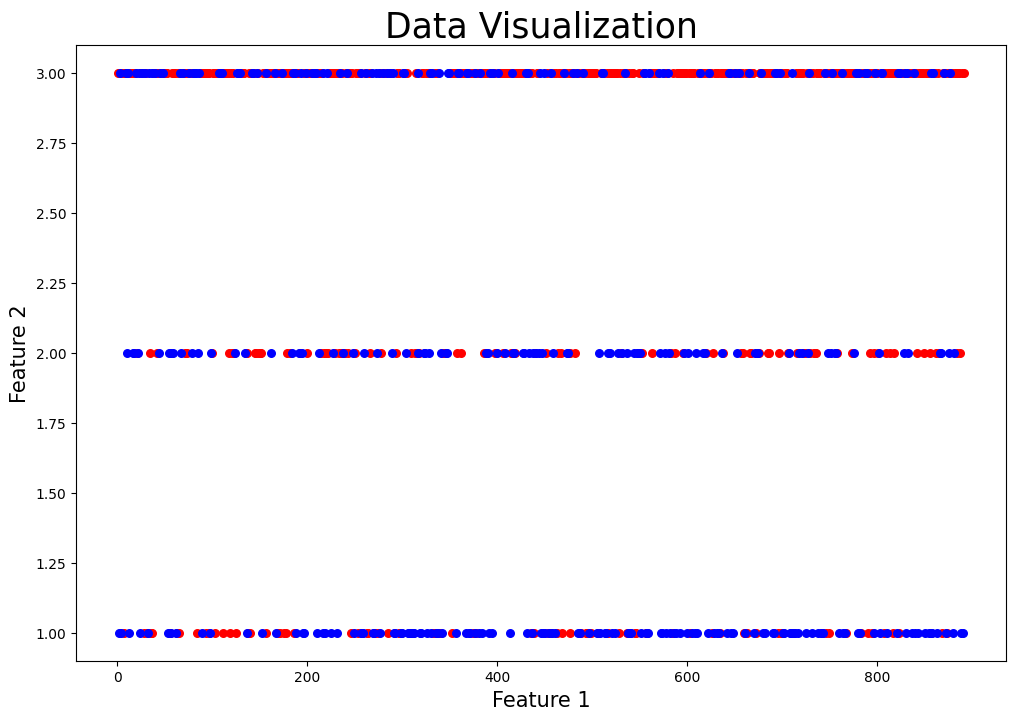

In [21]:
plt.figure(figsize = (12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 30, c = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 30, c = 'blue')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization', fontsize = 25)
plt.show()

#Application Decision Tree classifier

### Data Splitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
X_test.shape

(179, 9)

### Visualization of training data

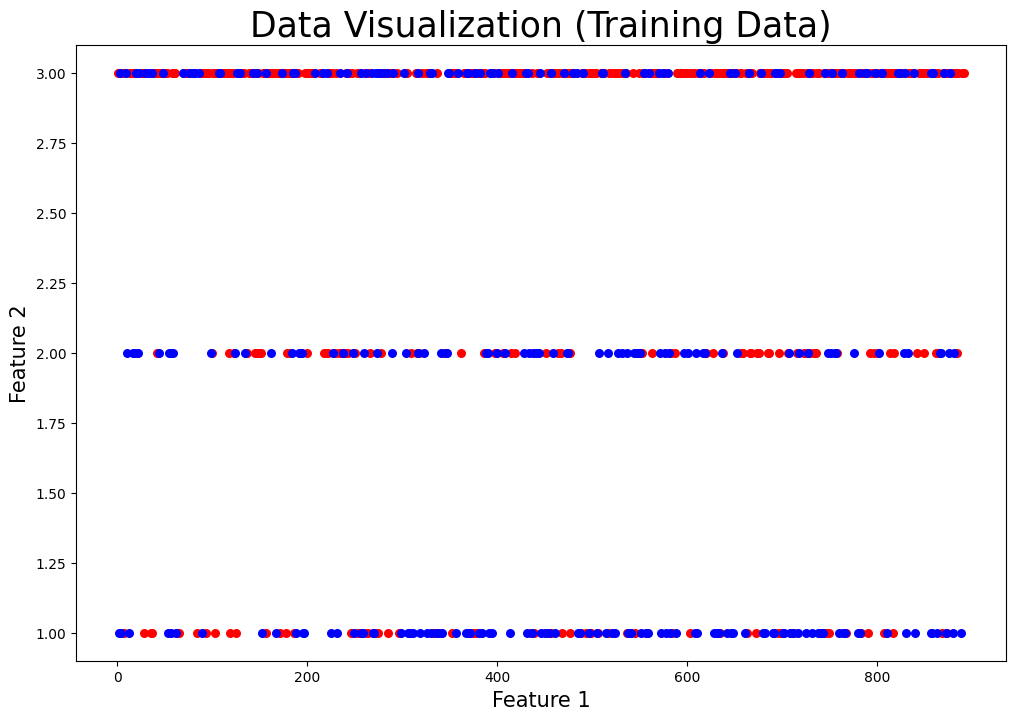

In [23]:
plt.figure(figsize = (12,8))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s = 30, c = 'red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s = 30, c = 'blue')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Training Data)', fontsize = 25)
plt.show()

## Instantiating tree model and fit to the data

In [25]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

## Getting Predictions from X_test

In [26]:
y_pred= dtree.predict(X_test)

## Calculating Accuracy

In [36]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 75.98


# Generating Confusion Matrix

In [38]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

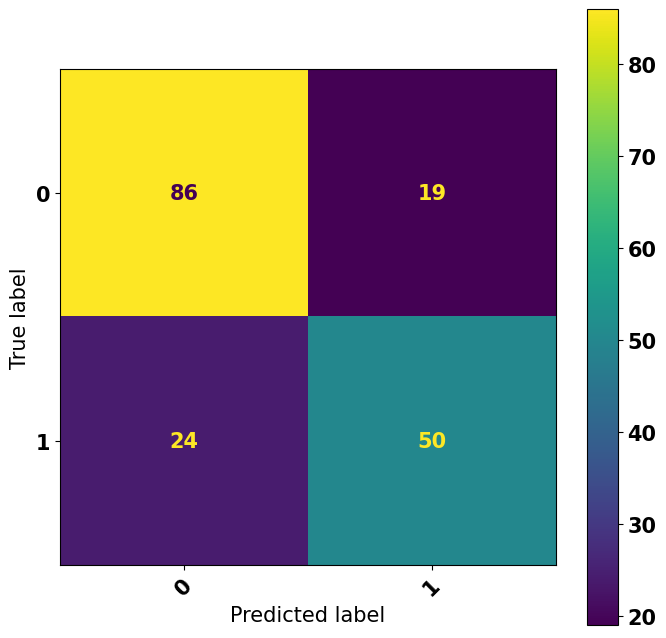

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

## Calculating Precision, Recall and F1-Score

In [40]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [41]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.759777,0.753228,0.747362,0.74965


## Visualize the tree

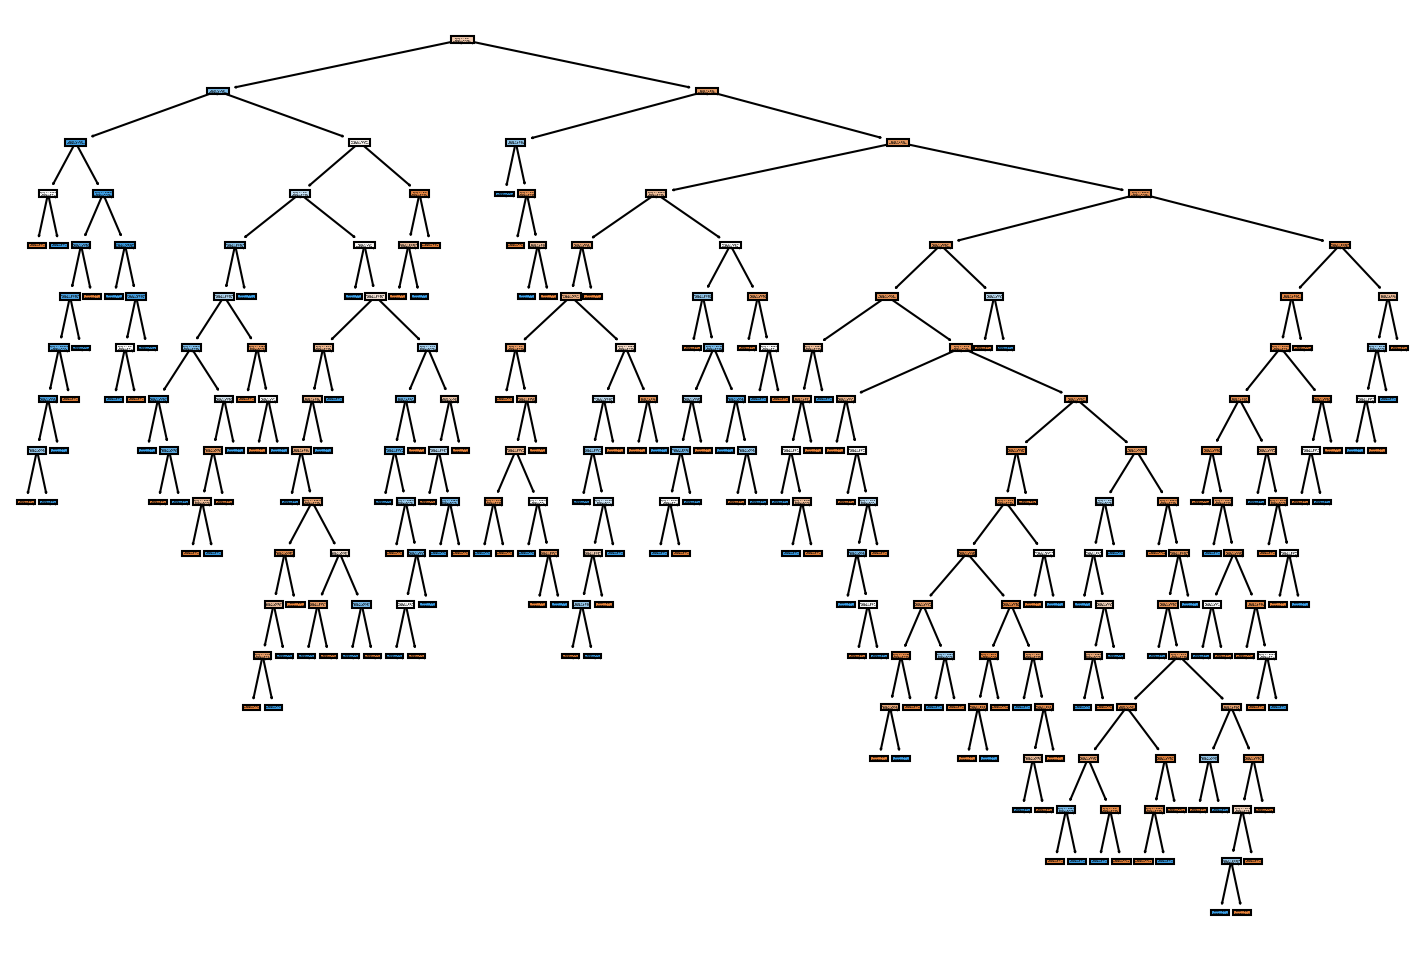

In [45]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dtree, filled = True);

#Application of Random Forest Classifier

## Instantiating Tree model and fit to the data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

In [50]:
rf = RandomForestClassifier(n_estimators=10,max_features='sqrt', bootstrap = True, oob_score = True, random_state=101)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

## Getting Predictions from test data

In [51]:
y_pred= rf.predict(X_test)

## Calculating Accuracy

In [52]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 81.01


## Generating Confusion Matrics

In [53]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

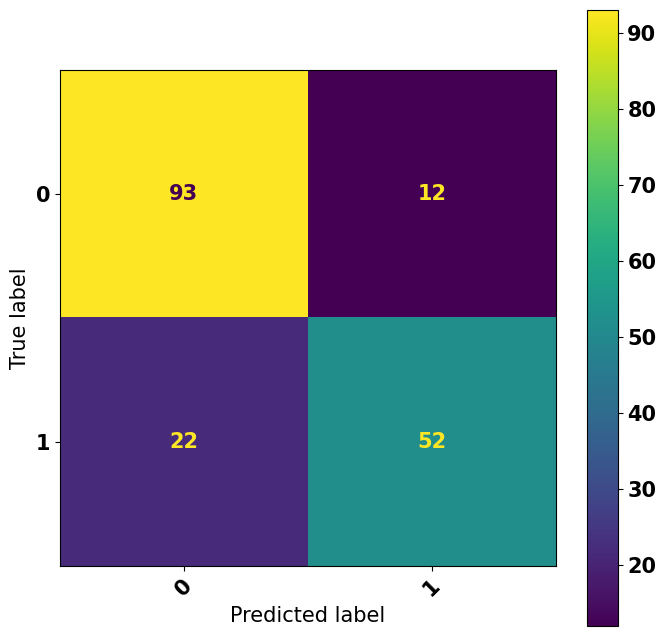

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

## Calculating Precision, Recall and F1-Score

In [55]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [56]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.810056,0.810598,0.794208,0.799539


## Calculating OOB Score and Error

In [57]:
rf.oob_score_

0.7696629213483146

In [58]:
out_of_bag_error = 1 - rf.oob_score_
out_of_bag_error

0.2303370786516854

## Estimating Number of Estimators

In [59]:
errors = []

for i in range(1,200):
    rfc = RandomForestClassifier( n_estimators = i, bootstrap=True, max_features = 5)

    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)

## Plotting Errors Vs Number of Estimators

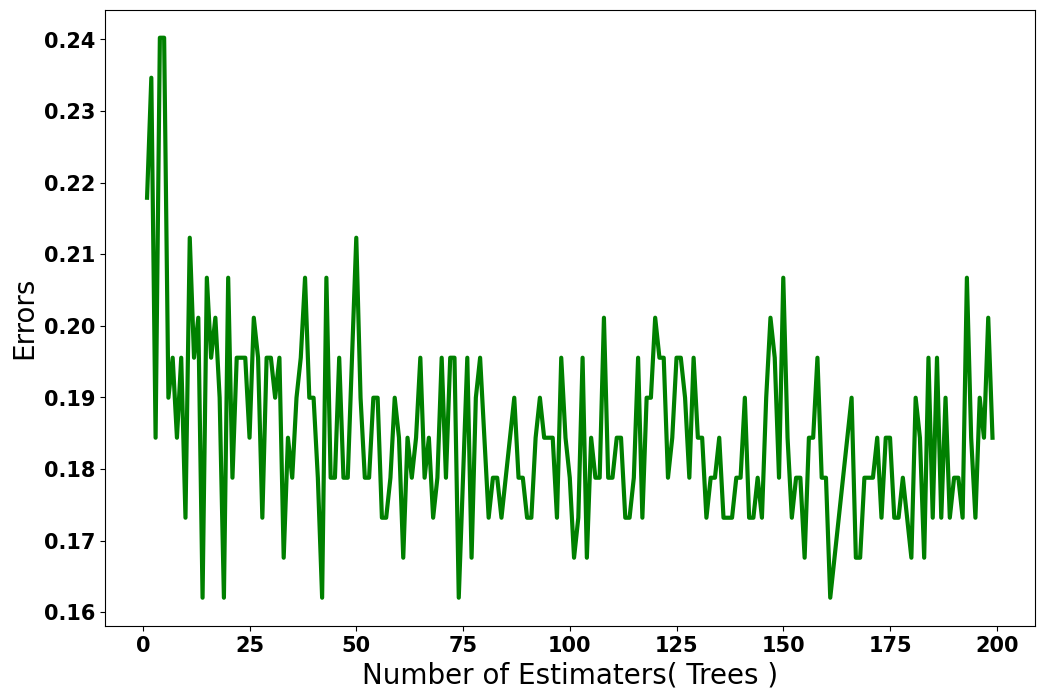

In [60]:
plt.figure(figsize = (12,8))
plt.plot(range(1,200),errors, 'g', lw = 3)
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()
